In [6]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.nn import Linear
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

In [7]:
w = torch.tensor(2.0, requires_grad = True)
b = torch.tensor(-1.0, requires_grad = True)

def forward(x):
    y = w*x + b
    #y.backward()
    return y

In [8]:
x = torch.tensor([[3.0]])
y_pred = forward(x)

# compute gradients
y_pred.backward()


y_pred = np.array(forward(x).detach())


# Display gradients
print('y_pred: ', y_pred)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)


# we can create a random linear regression model using Linear function of pyTorch


model_linear = Linear(in_features = 1, out_features = 1)

print(list(model_linear.parameters()))

x = torch.tensor([[1.0]])

y_pred = np.array(model_linear(x).detach())

y_pred:  [[5.]]
dy/dw: tensor(3.)
dy/db: tensor(1.)
[Parameter containing:
tensor([[-0.0528]], requires_grad=True), Parameter containing:
tensor([0.7261], requires_grad=True)]


[Parameter containing:
tensor([[-0.2150]], requires_grad=True), Parameter containing:
tensor([-0.8762], requires_grad=True)]


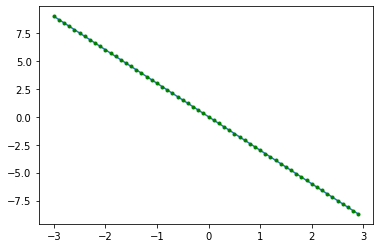

tensor(147.0816, grad_fn=<MeanBackward0>)
tensor(23.4939, grad_fn=<MeanBackward0>)
tensor(3.7528, grad_fn=<MeanBackward0>)
tensor(0.5994, grad_fn=<MeanBackward0>)


In [9]:
class LR(nn.Module):
    def __init__(self, in_size, out_size):
        nn.Module.__init__(self)
        self.linear = nn.Linear(in_size, out_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out

model_lr = LR(1,1)
print(list(model_lr.parameters()))

x = torch.tensor([[1.0],[2.0]])

y_pred = np.array(model_lr(x).detach())



w = torch.tensor(-10.0, requires_grad=True)
X = torch.arange(-3,3,0.1).view(-1,1)

f = -3*X

plt.plot(X.numpy(), f.numpy())
plt.plot(X.numpy(), f.numpy(),'g.')
plt.show()

def forward(x):
    y = w*x
    return y

def loss_criterion(yhat, y):
    return torch.mean((yhat - y)**2)

alpha = 0.1
y = f
loss_arr = []
for epoch in range(4):
    y_pred = forward(X)
    loss = loss_criterion(y_pred, y)
    loss_arr.append(loss)    
    print(loss)
    
    loss.backward()
    w.data = w.data - alpha*w.grad.data
    w.grad.data.zero_()

loss_arr = torch.tensor(loss_arr)

In [10]:
#-------------------------------------------------------------------------------
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)


inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = LR(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        self.y = -3*X + 1
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len
    
dataset = Data()

def loss_criterion_py(yhat, y):
        return nn.MSELoss()
    
trainloader = DataLoader(dataset, batch_size = 1)

model = LR(1,1)
param = model.parameters()

optimizer = torch.optim.SGD(param, lr = 0.01)

for epoch in range(0):
    for x,y in trainloader:
        y_pred_pt = model(x)
        loss = loss_criterion_py(y_pred_pt, y)
        optimizer.zero_grad()
        #differentiate the loss
        loss.backward()
        #update the parameters
        optimizer.step()

tensor(316.6465, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 0, loss 316.6465148925781
tensor(25.8414, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 1, loss 25.841432571411133
tensor(2.1212, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 2, loss 2.1212351322174072
tensor(0.1863, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 3, loss 0.18630355596542358
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 4, loss 0.02832891419529915
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 5, loss 0.015296826139092445
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 6, loss 0.014088835567235947
tensor(0.0138, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 7, loss 0.013846933841705322
tensor(0.0137, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 8, loss 0.013685404323041439
tensor(0.0135, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 9, loss 0.013532000593841076
tensor(0.0134, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 1